# **Assignment: Compresive Strength Concrete Problem**
## **Abstract:**
Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.


Data Set Characteristics:  

Multivariate

Number of Instances:

1030

Area:

Physical

Attribute Characteristics:

Real

Number of Attributes:

9

Date Donated

2007-08-03

Associated Tasks:

Regression

Missing Values?

N/A

Number of Web Hits:

231464

## **Description:**
###**Features Name  Data Type  Measurement  Description**
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable Water (component 4) | quantitative | kg in a m3 mixture | Input Variable Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable Age | quantitative | Day (1~365) | Input Variable Concrete compressive strength | quantitative | MPa | Output Variable

## **WORKFLOW :**
Load Data
Check Missing Values ( If Exist ; Fill each record with mean of its feature )
Standardized the Input Variables. Hint: Centeralized the data
Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
Train the Model with Epochs (100) and validate it
If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
Evaluation Step
Prediction
## **Load Data:**
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [2]:
import pathlib as pl
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam, SGD
from keras import models
from keras import layers

## **1.Load Data**

In [12]:
path = pl.Path("/content/drive/MyDrive/AI/DLAssignment/Compresive_Strength_Concrete_Problem/compresive_strength_concrete.csv")
data = pd.read_csv(path)

In [13]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [14]:
print(data.shape)

(1030, 9)


In [15]:
print(data.columns)

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')


## **2.Check Missing Values**

In [16]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [17]:
data.isnull()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1025,False,False,False,False,False,False,False,False,False
1026,False,False,False,False,False,False,False,False,False
1027,False,False,False,False,False,False,False,False,False
1028,False,False,False,False,False,False,False,False,False


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [19]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## **3. Standardized the Input Variables**

In [20]:
#A widespread best practice to deal with such data is to do feature-wise normalization
min = data.min(axis=0)
max = data.max(axis=0)
data -= min
data /= (max - min)

# (x - min) / (max - min)

In [21]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.074176,0.967485
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.205720,0.074176,0.741996
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.739011,0.472655
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,1.000000,0.482372
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.986264,0.522860


In [22]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,0.409059,0.205609,0.270806,0.477374,0.192691,0.499764,0.450528,0.122698,0.417191
std,0.238599,0.240065,0.319825,0.170561,0.185523,0.226029,0.201144,0.173544,0.208119
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.206336,0.000000,0.000000,0.344249,0.000000,0.380814,0.343578,0.016484,0.266351
50%,0.390183,0.061213,0.000000,0.504792,0.198758,0.485465,0.465379,0.074176,0.400087
75%,0.566210,0.397746,0.591204,0.560703,0.316770,0.663953,0.577020,0.151099,0.545721
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **4.Split**

In [23]:
#Input and output split
x = (data.loc[:, data.columns != 'Concrete compressive strength(MPa, megapascals) '])
y = (data.loc[:, data.columns == 'Concrete compressive strength(MPa, megapascals) '])

In [24]:
x.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.074176
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.205720,0.074176
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.739011
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,1.000000
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.986264


In [25]:
y.head()

,"Concrete compressive strength(MPa, megapascals)"
0,0.967485
1,0.741996
2,0.472655
3,0.482372
4,0.522860


In [26]:
print(int(.5*len(x)))
print(int(.8*len(x)))

515
824


In [27]:
#Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
#x_train, x_test, x_val = np.split(x, [int(.5*len(x)), int(.8*len(x))])
#y_train, y_test, y_val = np.split(y, [int(.5*len(y)), int(.8*len(y))])
x_train, x_test = np.split(x, [int(.7*len(x))])
y_train, y_test = np.split(y, [int(.7*len(y))])

In [28]:
print(len(x_train), len(x_test))

721 309


In [29]:
x_train.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.074176
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.205720,0.074176
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.739011
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,1.000000
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.986264


In [30]:
y_train.head()

,"Concrete compressive strength(MPa, megapascals)"
0,0.967485
1,0.741996
2,0.472655
3,0.482372
4,0.522860


## **5.Model & 6.Compilation Step**

In [33]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(10, activation='relu', input_shape=(x_train.shape[1],)))
  model.add(layers.Dense(10, activation='relu'))
  model.add(layers.Dense(8, activation='relu'))
  model.add(layers.Dense(6, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [34]:
import numpy as np
k = 4
num_val_samples = len(x_train) // k
num_epochs = 100
all_mae_histories = []
print(num_val_samples)

180


## **7.Train the Model**

In [35]:
for i in range(k):
  print('processing fold #', i)
  val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([x_train[:i * num_val_samples], x_train[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate([y_train[:i * num_val_samples], y_train[(i + 1) * num_val_samples:]], axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [36]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

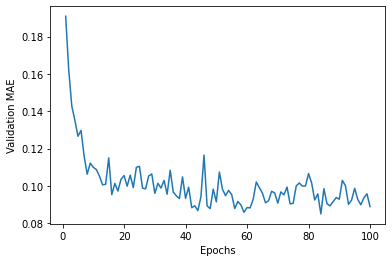

In [37]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [38]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])

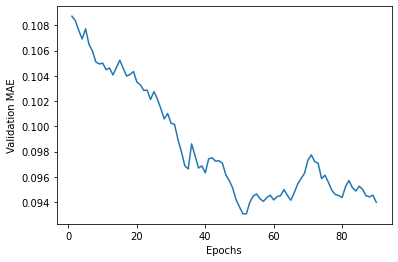

In [39]:
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

## **8. Tune Model**

In [40]:
model = build_model()
model.fit(x_train, y_train, epochs=18, batch_size=16, verbose=0)

## **9.Evaluation Step**

In [41]:
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.0186 - mae: 0.1057


In [42]:
test_mse_score

0.01855505257844925

In [44]:
test_mae_score

0.10574660450220108

## **10.Prediction**

In [43]:
model.predict(x_test)

array([[0.16184308],
       [0.17435715],
       [0.24005595],
       [0.39641526],
       [0.43224734],
       [0.17937109],
       [0.19188514],
       [0.25758392],
       [0.43255156],
       [0.46393406],
       [0.19120848],
       [0.20372263],
       [0.26942137],
       [0.46338916],
       [0.49794254],
       [0.14426756],
       [0.19913518],
       [0.18723232],
       [0.25293103],
       [0.22190586],
       [0.4535714 ],
       [0.62151814],
       [0.36433294],
       [0.16894245],
       [0.23650295],
       [0.37721258],
       [0.38346967],
       [0.39598367],
       [0.41788322],
       [0.4616825 ],
       [0.4589257 ],
       [0.47938302],
       [0.52029765],
       [0.6001615 ],
       [0.6638566 ],
       [0.72755164],
       [0.22639087],
       [0.24829045],
       [0.2920896 ],
       [0.3622744 ],
       [0.43362597],
       [0.45002618],
       [0.2730669 ],
       [0.2796174 ],
       [0.29271853],
       [0.3156453 ],
       [0.35963622],
       [0.459